# Plot tensorboard logs
ref: https://github.com/j3soon/tbparse

In [1]:
from tbparse import SummaryReader

In [11]:
log_dir = r"C:\Users\helei\Documents\GitHub\UAV_Navigation_DRL_AirSim\logs\SimpleAvoid_SimpleMultirotor_2D\2022_03_12_10_09\tb_logs\TD3_1"
reader = SummaryReader(log_dir)
df = reader.scalars

In [12]:
print(df)

      step                  tag   value
0      447   rollout/crash_rate  1.0000
1      774   rollout/crash_rate  1.0000
2      975   rollout/crash_rate  1.0000
3     1291   rollout/crash_rate  1.0000
4     2003   rollout/crash_rate  0.9500
..     ...                  ...     ...
837  82862  train/learning_rate  0.0005
838  83683  train/learning_rate  0.0005
839  84485  train/learning_rate  0.0005
840  85275  train/learning_rate  0.0005
841  85864  train/learning_rate  0.0005

[842 rows x 3 columns]


[Text(0.5, 1.0, 'run0')]

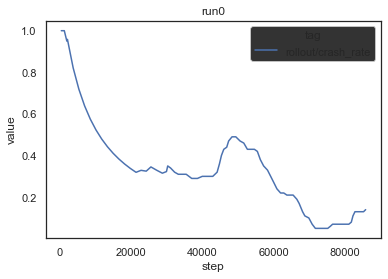

In [14]:
df = df[df['tag'] == 'rollout/crash_rate']
g = sns.lineplot(data=df, x='step', y='value', hue='tag')
g.set(title='run0')

In [6]:
df = SummaryReader(log_dir).histograms
df.columns

Index(['step', 'tag', 'counts', 'limits'], dtype='object')

In [7]:
df = SummaryReader(log_dir, pivot=True).histograms
df.columns

Index(['step', 'actor/fc_b1/counts', 'actor/fc_b1/limits',
       'actor/fc_b2/counts', 'actor/fc_b2/limits', 'actor/fc_b3/counts',
       'actor/fc_b3/limits', 'actor/fc_w1/counts', 'actor/fc_w1/limits',
       'actor/fc_w2/counts', 'actor/fc_w2/limits', 'actor/fc_w3/counts',
       'actor/fc_w3/limits', 'critics_qf0/fc_b1/counts',
       'critics_qf0/fc_b1/limits', 'critics_qf0/fc_b2/counts',
       'critics_qf0/fc_b2/limits', 'critics_qf0/fc_b3/counts',
       'critics_qf0/fc_b3/limits', 'critics_qf0/fc_w1/counts',
       'critics_qf0/fc_w1/limits', 'critics_qf0/fc_w2/counts',
       'critics_qf0/fc_w2/limits', 'critics_qf0/fc_w3/counts',
       'critics_qf0/fc_w3/limits'],
      dtype='object')

KeyError: 'dist/counts'

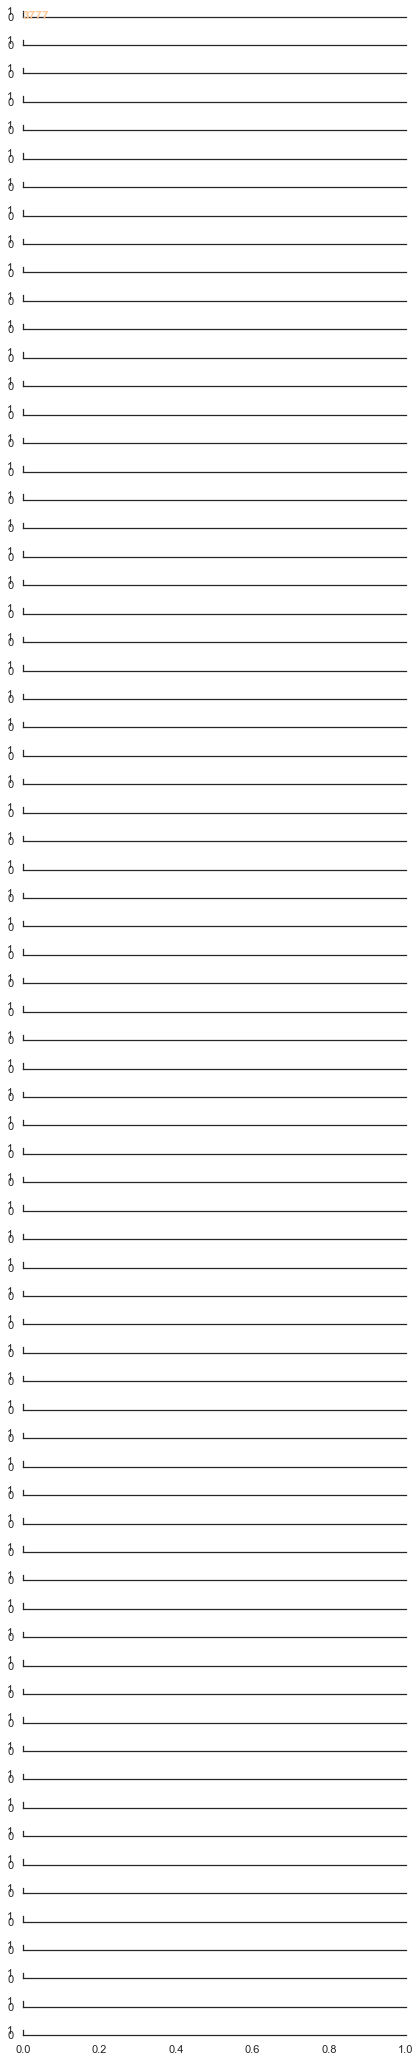

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
df = reader.histograms
# Set background
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Choose color palettes for the distributions
pal = sns.color_palette("Oranges", 20)[5:-5]
# Initialize the FacetGrid object (stacking multiple plots)
g = sns.FacetGrid(df, row='step', hue='step', aspect=15, height=.4, palette=pal)

def plot_subplots(x, color, label, data):
    ax = plt.gca()
    ax.text(0, .08, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    counts = data['dist/counts'].iloc[0]
    limits = data['dist/limits'].iloc[0]
    x = np.linspace(limits[0], limits[-1], 15)
    x, y = SummaryReader.histogram_to_pdf(counts, limits, x)
    # Draw the densities in a few steps
    sns.lineplot(x=x, y=y, clip_on=False, color="w", lw=2)
    ax.fill_between(x, y, color=color)
# Plot each subplots with df[df['step']==i]
g.map_dataframe(plot_subplots, None)

# Add a bottom line for each subplot
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Set the subplots to overlap (i.e., height of each distribution)
g.figure.subplots_adjust(hspace=-.9)
# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], xlabel="", ylabel="")
g.despine(bottom=True, left=True)